In [76]:
import cv2
print cv2.__version__

3.4.3


In [677]:
# USAGE
# python text_detection.py --image images/lebron_james.jpg --east frozen_east_text_detection.pb

# import the necessary packages
from imutils.object_detection import non_max_suppression
import numpy as np
import argparse
import time
import cv2
import pytesseract
import math

In [678]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str,
# 	help="path to input image")
# ap.add_argument("-east", "--east", type=str,
# 	help="path to input EAST text detector")
# ap.add_argument("-c", "--min-confidence", type=float, default=0.5,
# 	help="minimum probability required to inspect a region")
# ap.add_argument("-w", "--width", type=int, default=320,
# 	help="resized image width (should be multiple of 32)")
# ap.add_argument("-e", "--height", type=int, default=320,
# 	help="resized image height (should be multiple of 32)")
# args = vars(ap.parse_args())

In [688]:
min_confidence = 0.5
width = 960
height = 960
args = {
#         'image' : './images/sign.jpg', 
#         'image' : './images/car_wash.png',
#         'image' : './images/lebron_james.jpg',
        'image' : './images/Screenshot from 2018-10-28 19-29-11.png',
        'east' : './frozen_east_text_detection.pb', 
        'min_confidence' : min_confidence,
        'width' : width, 
        'height' : height}

In [689]:
# load the input image and grab the image dimensions
image = cv2.imread(args["image"])
orig = image.copy()
(H, W) = image.shape[:2]

tesseractOutputImage = np.zeros_like(orig)

# set the new width and height and then determine the ratio in change
# for both the width and height
(newW, newH) = (args["width"], args["height"])
rW = W / float(newW)
rH = H / float(newH)

# resize the image and grab the new image dimensions
image = cv2.resize(image, (newW, newH))
(H, W) = image.shape[:2]

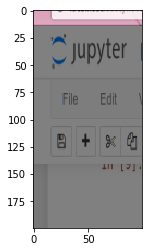

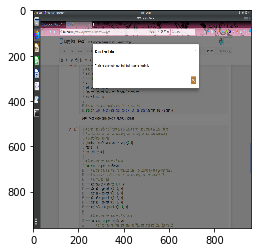

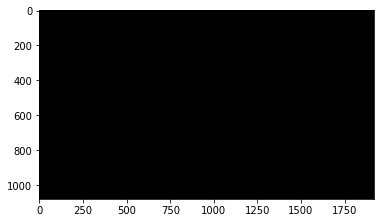

In [690]:
from matplotlib import pyplot as plt
# portion = cv2.rectangle(image,(x,y),( x + w, y + h ),(0,255,0),2)
portion = image[100:300, 100:200]
plt.imshow(portion)
plt.show()
plt.imshow(image)
plt.show()
plt.imshow(tesseractOutputImage)
plt.show()

In [691]:
# define the two output layer names for the EAST detector model that
# we are interested -- the first is the output probabilities and the
# second can be used to derive the bounding box coordinates of text
layerNames = [
	"feature_fusion/Conv_7/Sigmoid",
	"feature_fusion/concat_3"]

In [692]:
# load the pre-trained EAST text detector
print("[INFO] loading EAST text detector...")
net = cv2.dnn.readNet(args["east"])

[INFO] loading EAST text detector...


In [693]:
# construct a blob from the image and then perform a forward pass of
# the model to obtain the two output layer sets
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
	(123.68, 116.78, 103.94), swapRB=True, crop=False)
start = time.time()
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)
end = time.time()

# show timing information on text prediction
print("[INFO] text detection took {:.6f} seconds".format(end - start))

[INFO] text detection took 1.896354 seconds


In [694]:
# grab the number of rows and columns from the scores volume, then
# initialize our set of bounding box rectangles and corresponding
# confidence scores
(numRows, numCols) = scores.shape[2:4]
rects = []
confidences = []

# loop over the number of rows
for y in range(0, numRows):
	# extract the scores (probabilities), followed by the geometrical
	# data used to derive potential bounding box coordinates that
	# surround text
	scoresData = scores[0, 0, y]
	xData0 = geometry[0, 0, y]
	xData1 = geometry[0, 1, y]
	xData2 = geometry[0, 2, y]
	xData3 = geometry[0, 3, y]
	anglesData = geometry[0, 4, y]

	# loop over the number of columns
	for x in range(0, numCols):
		# if our score does not have sufficient probability, ignore it
		if scoresData[x] < args["min_confidence"]:
			continue

		# compute the offset factor as our resulting feature maps will
		# be 4x smaller than the input image
		(offsetX, offsetY) = (x * 4.0, y * 4.0)

		# extract the rotation angle for the prediction and then
		# compute the sin and cosine
		angle = anglesData[x]
		cos = np.cos(angle)
		sin = np.sin(angle)

		# use the geometry volume to derive the width and height of
		# the bounding box
		h = xData0[x] + xData2[x]
		w = xData1[x] + xData3[x]

		# compute both the starting and ending (x, y)-coordinates for
		# the text prediction bounding box
		endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
		endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
		startX = int(endX - w)
		startY = int(endY - h)

		# add the bounding box coordinates and probability score to
		# our respective lists
		rects.append((startX, startY, endX, endY))
		confidences.append(scoresData[x])

(478, 580, 530, 597)
('Text Scale: ', 0.08386555706083479)
('Text Thickness: ', 0)


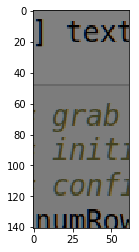

('Text:', '] text\ngrab\ninit,\nconf\n\nniumRoy')
(546, 524, 628, 541)
('Text Scale: ', 0.10512281421465564)
('Text Thickness: ', 0)


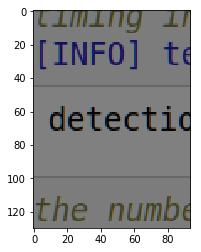

('Text:', 'CLMILIG LT\n[INFO] te\ndetectic\nthe numbe')
(1140, 581, 1190, 596)
('Text Scale: ', 0.20829861689718376)
('Text Thickness: ', 0)


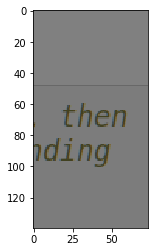

('Text:', '_ then\niding')
(966, 32, 1012, 46)
('Text Scale: ', 0.3832055981339554)
('Text Thickness: ', 0)


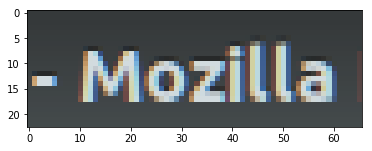

('Text:', 'my aey')
(1244, 100, 1296, 114)
('Text Scale: ', 0.3249187703074231)
('Text Thickness: ', 0)


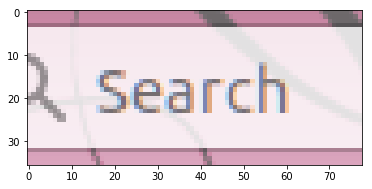

('Text:', 'X Search')
(416, 525, 478, 544)
('Text Scale: ', 0.17220308854571714)
('Text Thickness: ', 0)


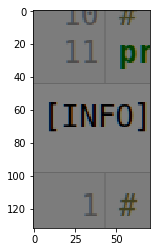

('Text:', 'au\n11 pr\n[INFO]\n1#')
(1056, 579, 1136, 596)
('Text Scale: ', 0.2352664392424421)
('Text Thickness: ', 0)


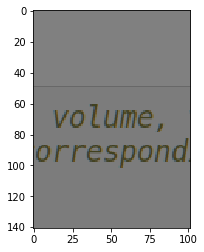

('Text:', 'volume,\norrespond')
(488, 524, 540, 542)
('Text Scale: ', 0.09628916376564699)
('Text Thickness: ', 0)


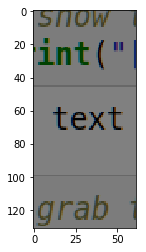

('Text:', 'STOW |\n\xe2\x80\x98int("\ntext\ngrab 7')
(690, 580, 746, 597)
('Text Scale: ', 0.10768402430582263)
('Text Thickness: ', 0)


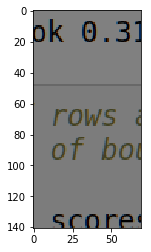

('Text:', 'ok 0.31\nrows \xc2\xab\nof bo\none:')
(806, 148, 884, 164)
('Text Scale: ', 1950.0)
('Text Thickness: ', 4)


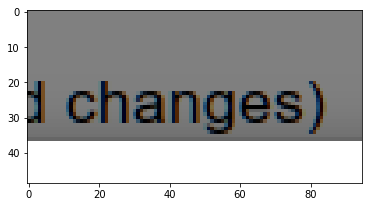

('Text:', '')
(352, 99, 480, 112)
('Text Scale: ', 0.37642630278790734)
('Text Thickness: ', 0)


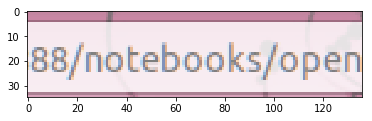

('Text:', '88/notebooks/open')
(620, 193, 700, 213)
('Text Scale: ', 0.4443457009553432)
('Text Thickness: ', 0)


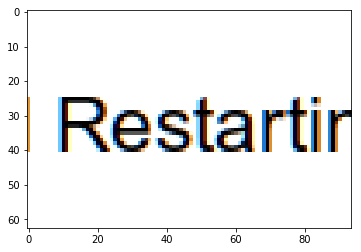

('Text:', 'Restartir')
(262, 100, 334, 114)
('Text Scale: ', 0.3599280143971206)
('Text Thickness: ', 0)


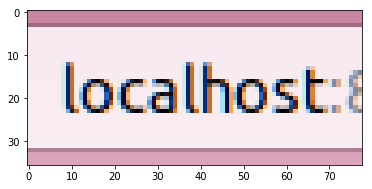

('Text:', 'localhost:')
(1032, 603, 1182, 622)
('Text Scale: ', 0.24191987613702343)
('Text Thickness: ', 0)


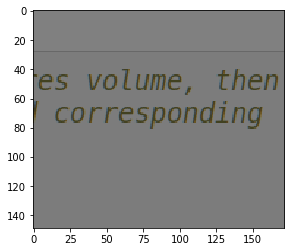

('Text:', 'es volume, then\n| corresponding')
(812, 525, 900, 541)
('Text Scale: ', 0.11891249121669098)
('Text Thickness: ', 0)


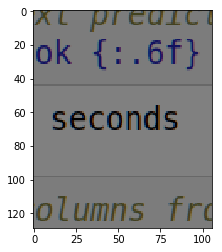

('Text:', 'AL Pesce\nok {:.6f}\nseconds\nolumns fre')
(92, 61, 254, 77)
('Text Scale: ', 0.47641453946594525)
('Text Thickness: ', 0)


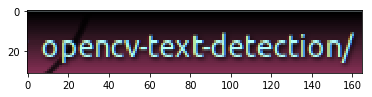

('Text:', 'Cyruanertee cre f')
(512, 147, 606, 165)
('Text Scale: ', 2349.9999999999995)
('Text Thickness: ', 4)


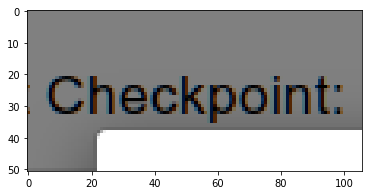

('Text:', '')
(270, 138, 378, 165)
('Text Scale: ', 0.7712082262210798)
('Text Thickness: ', 0)


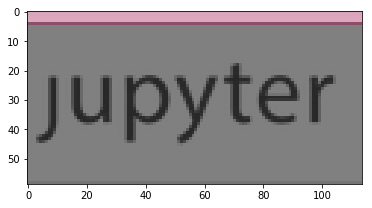

('Text:', 'jupyter')
(766, 266, 812, 281)
('Text Scale: ', 0.25549877804932236)
('Text Thickness: ', 0)


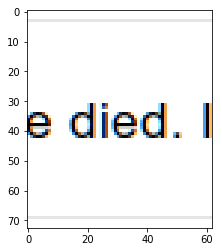

('Text:', 'e died. |')
(1688, 147, 1744, 162)
('Text Scale: ', 0.4665111629456848)
('Text Thickness: ', 0)


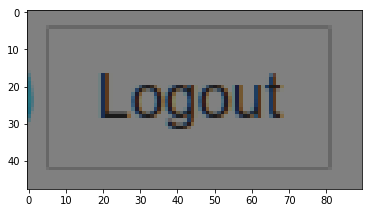

('Text:', 'Logout')
(342, 579, 404, 599)
('Text Scale: ', 0.6197520991603358)
('Text Thickness: ', 0)


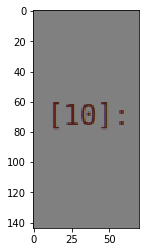

('Text:', '[10]:')
(906, 31, 958, 46)
('Text Scale: ', 1.298701298701299)
('Text Thickness: ', 0)


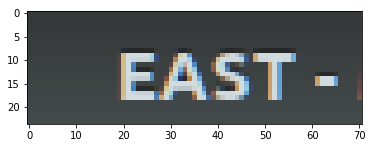

('Text:', 'rs')
(658, 526, 704, 542)
('Text Scale: ', 0.09999130510390403)
('Text Thickness: ', 0)


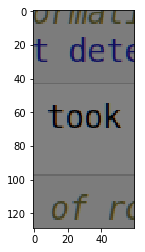

('Text:', '\xe2\x80\x94--\nt dete\ntook\nof rc')
(734, 525, 806, 543)
('Text Scale: ', 0.12412937038824909)
('Text Thickness: ', 0)


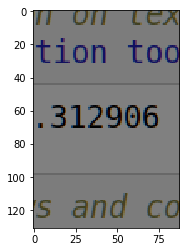

('Text:', 'ee\ntion too\n-312906\n\nS and co')
(620, 460, 748, 480)
('Text Scale: ', 0.19998750078120117)
('Text Thickness: ', 0)


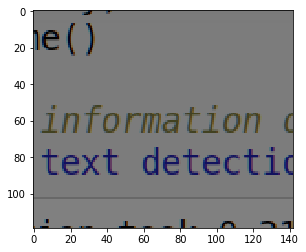

('Text:', 'e()\ninformation \xc2\xab\ntext detectic')
(1636, 191, 1724, 211)
('Text Scale: ', 0.36660556573904346)
('Text Thickness: ', 0)


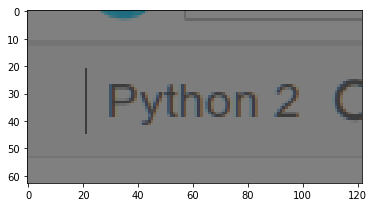

('Text:', '| Python 2 C')
(792, 578, 874, 596)
('Text Scale: ', 0.1108048213610075)
('Text Thickness: ', 0)


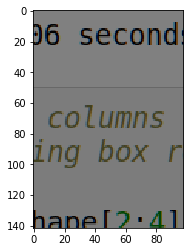

('Text:', 'J6 second\ncolumns\ning box r\nhanel>-Al')
(210, 4, 282, 19)
('Text Scale: ', 0.3599280143971206)
('Text Thickness: ', 0)


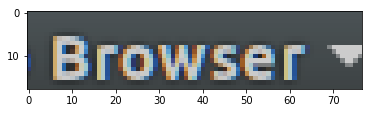

('Text:', 'Browser \xc2\xa5')
(582, 579, 654, 596)
('Text Scale: ', 0.08371703641691083)
('Text Thickness: ', 0)


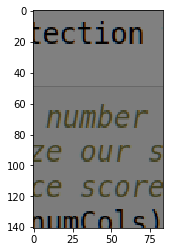

('Text:', 'tection\nnumber\nze our Ss\nce score\nsimCn] c)')
(318, 63, 358, 77)
('Text Scale: ', 0.6662225183211192)
('Text Thickness: ', 0)


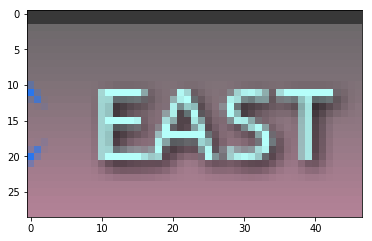

('Text:', '257')
(974, 580, 1050, 596)
('Text Scale: ', 0.18998100189981004)
('Text Thickness: ', 0)


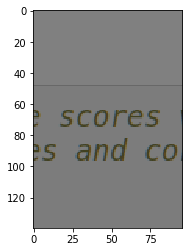

('Text:', '> Scores |\n>S and co')
(10, 5, 86, 20)
('Text Scale: ', 0.3799240151969606)
('Text Thickness: ', 0)


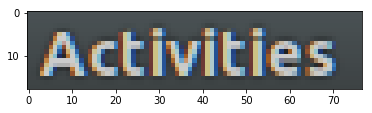

('Text:', 'Activities')
(1020, 32, 1078, 47)
('Text Scale: ', 0.966022651565623)
('Text Thickness: ', 0)


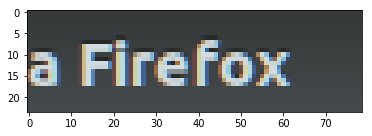

('Text:', 'aad')
(836, 461, 954, 479)
('Text Scale: ', 0.25649943483175375)
('Text Thickness: ', 0)


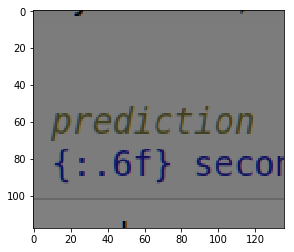

('Text:', 'prediction\n{:.6f} secor')
(850, 804, 950, 826)
('Text Scale: ', 0.22725206799381875)
('Text Thickness: ', 0)


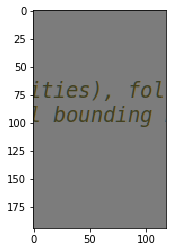

('Text:', 'ities), fol\nl bounding')
(496, 623, 602, 642)
('Text Scale: ', 0.07793888415046618)
('Text Thickness: ', 0)


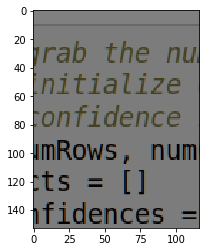

('Text:', 'yrab the nui\ninitialize |\n-onfidence\nmRows, num\nts = []\n\n\\fidences =')
(578, 1011, 634, 1028)
('Text Scale: ', 0.06828935173893957)
('Text Thickness: ', 0)


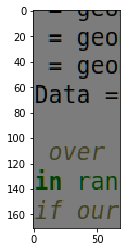

('Text:', 'gee\n= geo\n= geo\nData =\nover\nin ran\nif our')
(484, 739, 530, 757)
('Text Scale: ', 0.07666155589627359)
('Text Thickness: ', 0)


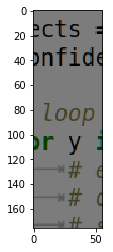

('Text:', 'ects =\nnf ide\nloop\nry i\n#\n#\n,.')
(476, 598, 598, 619)
('Text Scale: ', 0.08355935453823184)
('Text Thickness: ', 0)


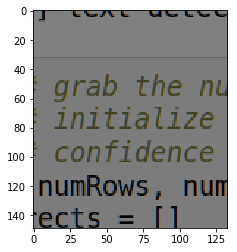

('Text:', '>\n\xe2\x80\x98 grab the nu\n\xe2\x80\x98 initialize\n\xe2\x80\x98 confidence\nnumRows, num\n\xe2\x80\x98ects = []')
(1094, 784, 1190, 802)
('Text Scale: ', 0.218161985274066)
('Text Thickness: ', 0)


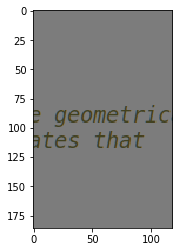

('Text:', '2 geometric.\nates that')
(644, 851, 736, 869)
('Text Scale: ', 0.04742170264530629)
('Text Thickness: ', 0)


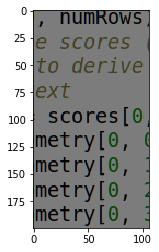

('Text:', "'\xc2\xbb NUMROWS ,\ne scores |\nto derive\next\n\n- scores[0,\nmetry[0, \xc2\xa2\nmetry[0, \xc2\xb0\nmetry[0, ;\nmetry[0, :")
(530, 100, 632, 113)
('Text Scale: ', 0.3187101612298463)
('Text Thickness: ', 0)


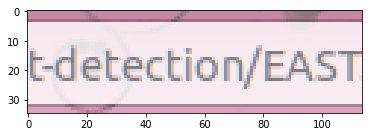

('Text:', 't-detection/EAST')
(840, 1054, 984, 1076)
('Text Scale: ', 0.35996400359964)
('Text Thickness: ', 0)


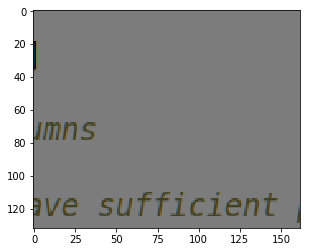

('Text:', 'mns\nave sufficient |')
(1526, 191, 1592, 209)
('Text Scale: ', 0.4712939160239932)
('Text Thickness: ', 0)


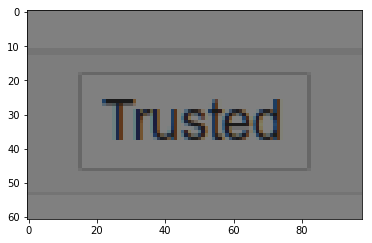

('Text:', 'Trusted')
(520, 1011, 576, 1029)
('Text Scale: ', 0.06511325054648621)
('Text Thickness: ', 0)


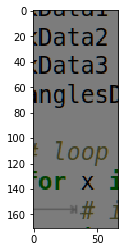

('Text:', 'Data2\n\xe2\x80\x98Data3\ninglesL\nt loop\n\xe2\x80\x98or x j\n\n#1')
(828, 394, 884, 414)
('Text Scale: ', 1400.0)
('Text Thickness: ', 4)


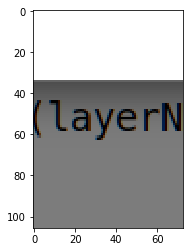

('Text:', '')
(606, 918, 704, 938)
('Text Scale: ', 0.04999897961266097)
('Text Thickness: ', 0)


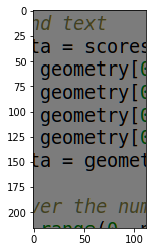

('Text:', 'rd text\n\nta = scores\ngeomet ry [(\ngeomet ry [(\ngeomet ry [(\ngeomet ry [(\nta = geomet\nyer the nun\n_')
(1152, 484, 1236, 505)
('Text Scale: ', 0.46656298600311036)
('Text Thickness: ', 0)


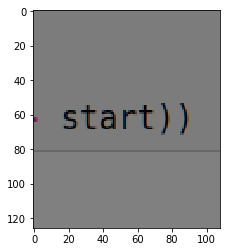

('Text:', '. start))')
(464, 394, 550, 414)
('Text Scale: ', 2150.0)
('Text Thickness: ', 4)


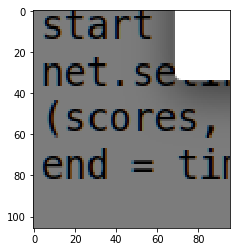

('Text:', '')
(998, 804, 1134, 824)
('Text Scale: ', 0.22665155656289585)
('Text Thickness: ', 0)


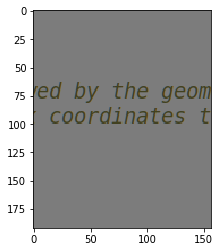

('Text:', 'ed by the geom\n- coordinates t')
(860, 268, 910, 281)
('Text Scale: ', 0.22723141247045991)
('Text Thickness: ', 0)


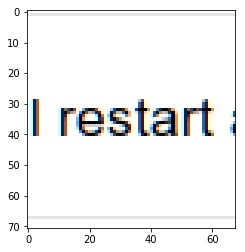

('Text:', '| restart ;')
(876, 579, 928, 598)
('Text Scale: ', 0.13682770234712138)
('Text Thickness: ', 0)


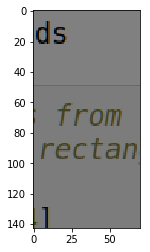

('Text:', 'ds\n\n| from\nrectan\n7')
(1122, 1055, 1206, 1080)
('Text Scale: ', 0.41991601679664065)
('Text Thickness: ', 0)


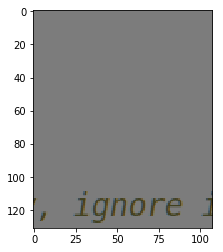

('Text:', ', ignore 1')
(1010, 486, 1082, 505)
('Text Scale: ', 0.3599280143971206)
('Text Thickness: ', 0)


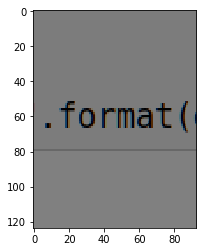

('Text:', '. format (')
(724, 599, 816, 621)
('Text Scale: ', 0.1483775240307077)
('Text Thickness: ', 0)


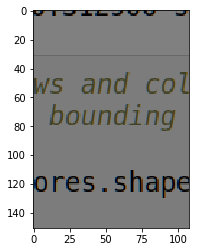

('Text:', 'ws and col\nbounding\nores. shape')
(932, 580, 976, 597)
('Text Scale: ', 0.1571204113698043)
('Text Thickness: ', 0)


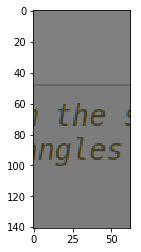

('Text:', ') the ;\ningles')
(746, 803, 850, 823)
('Text Scale: ', 0.09999615399407716)
('Text Thickness: ', 0)


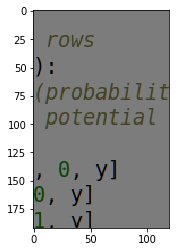

('Text:', 'rows\n\noF\n(probabilit\npotential\n, 9, yl\n\n8, yl\n\n1.vil')
(908, 486, 1002, 504)
('Text Scale: ', 0.24734238501210398)
('Text Thickness: ', 0)


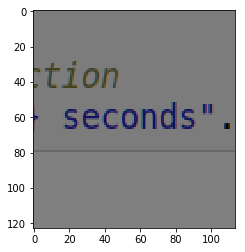

('Text:', '\xe2\x80\x98tion\n- seconds".')
(120, 3, 210, 20)
('Text Scale: ', 0.40901654244682784)
('Text Thickness: ', 0)


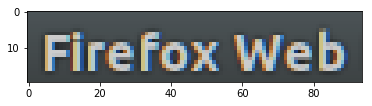

('Text:', 'Firefox Web')
(394, 139, 466, 164)
('Text Scale: ', 0.8995502248875563)
('Text Thickness: ', 0)


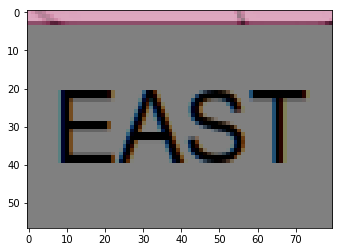

('Text:', 'EAST')
(458, 101, 558, 112)
('Text Scale: ', 0.31246094238220223)
('Text Thickness: ', 0)


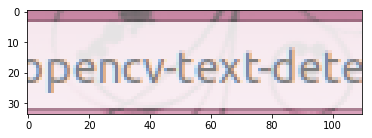

('Text:', '>pencv-text-dete')
(612, 148, 692, 165)
('Text Scale: ', 2000.0)
('Text Thickness: ', 4)


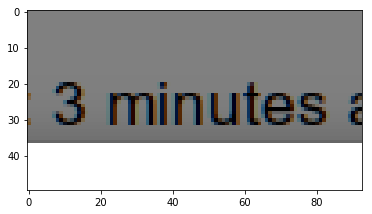

('Text:', '')
(738, 393, 822, 411)
('Text Scale: ', 2100.0)
('Text Thickness: ', 4)


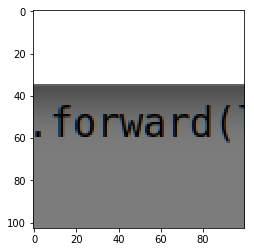

('Text:', '')
(604, 1032, 674, 1051)
('Text Scale: ', 0.0699972001119955)
('Text Thickness: ', 0)


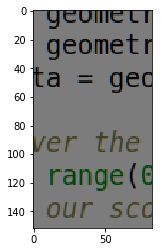

('Text:', 'geet\ngeometr\nta = gec\nver the\nrange (\xe2\x82\xac\xc3\xa9\nour scc')
(984, 1054, 1084, 1076)
('Text Scale: ', 0.4165972337943675)
('Text Thickness: ', 0)


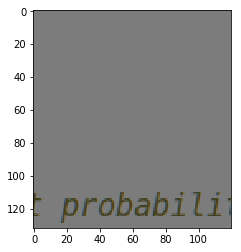

('Text:', '+ probabili:')
(1028, 100, 1064, 112)
('Text Scale: ', 0.44977511244377816)
('Text Thickness: ', 0)


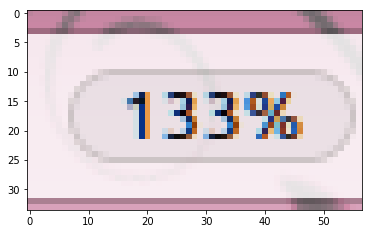

('Text:', '133%')
(1130, 803, 1186, 822)
('Text Scale: ', 0.1749781277340333)
('Text Thickness: ', 0)


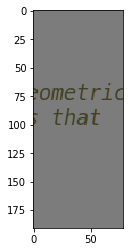

('Text:', '-omet ric\n5 that')
(538, 463, 608, 482)
('Text Scale: ', 0.12068133232190884)
('Text Thickness: ', 0)


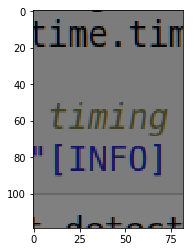

('Text:', 'time. tin\ntiming\n\n" [INFO]\n\n_')
(1082, 486, 1134, 505)
('Text Scale: ', 0.371322479291631)
('Text Thickness: ', 0)


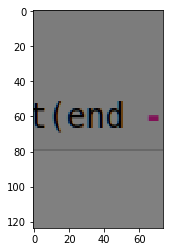

('Text:', 't(end -')
(542, 736, 592, 754)
('Text Scale: ', 0.07352508675960237)
('Text Thickness: ', 0)


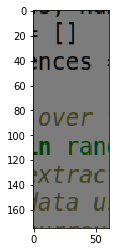

('Text:', '- (]\n\nnces -\nover\nran\nxtrac\nlata u')
(788, 1011, 864, 1028)
('Text Scale: ', 0.11514453669474578)
('Text Thickness: ', 0)


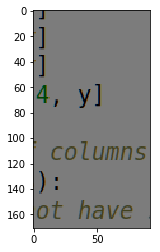

('Text:', '-\nJ\n\nJ\n\n4, yl\ncolumns\nes\n\not have')
(736, 580, 790, 598)
('Text Scale: ', 0.08181322344100357)
('Text Thickness: ', 0)


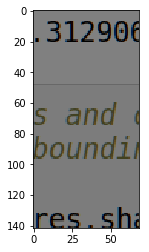

('Text:', '. 312906\ns and |\nboundii\nres. ch;')
(460, 351, 522, 369)
('Text Scale: ', 0.10688918005654782)
('Text Thickness: ', 0)


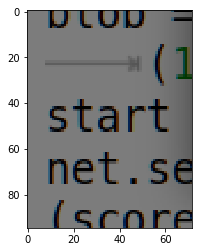

('Text:', '_\xe2\x80\x94\n\nq\nstart\nnet. s\xc3\xa9\nlernra')
(466, 194, 524, 210)
('Text Scale: ', 1450.0)
('Text Thickness: ', 4)


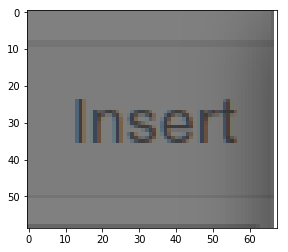

('Text:', '')
(636, 736, 712, 754)
('Text Scale: ', 0.09499525023748812)
('Text Thickness: ', 0)


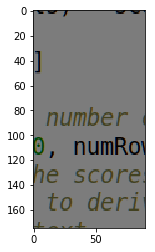

('Text:', ']\n\nnumber \xc2\xab\nQ, numRo\\\nhe score.\nto deri')
(390, 196, 436, 210)
('Text Scale: ', 0.574712643678161)
('Text Thickness: ', 0)


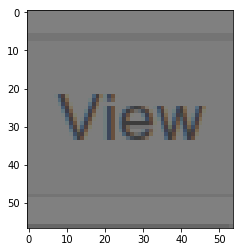

('Text:', 'View')
(686, 1009, 758, 1027)
('Text Scale: ', 0.05714104314148757)
('Text Thickness: ', 0)


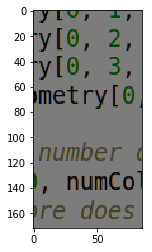

('Text:', 'Jtwro\xe2\x80\x9ct\ny[0, 2,\nyl0, 3,\nmetry [0,\nnumber \xc2\xab\n), numCo!\nre does')
(818, 603, 862, 619)
('Text Scale: ', 0.10475192838777261)
('Text Thickness: ', 0)


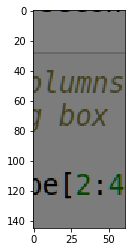

('Text:', '\xc2\xbbLumns\ny box\nye [2:4')
(538, 482, 604, 505)
('Text Scale: ', 0.13748854262144822)
('Text Thickness: ', 0)


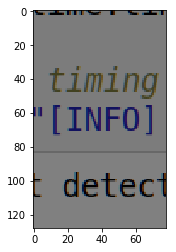

('Text:', 'timing\n" [INFO]\nt detect')
(954, 781, 1018, 803)
('Text Scale: ', 0.18821315139395367)
('Text Thickness: ', 0)


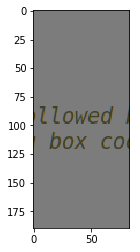

('Text:', 'LLowed |\n| box co')
(914, 265, 1022, 280)
('Text Scale: ', 0.3374578177727784)
('Text Thickness: ', 0)


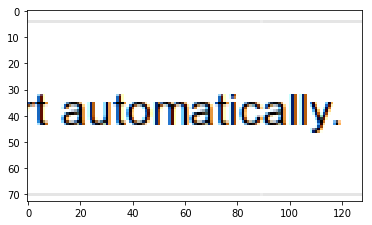

('Text:', 't automatically.')
(942, 3, 1004, 19)
('Text Scale: ', 0.38740314921269675)
('Text Thickness: ', 0)


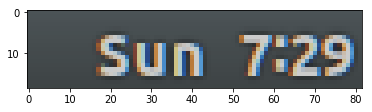

('Text:', 'Sun 7:29')
(726, 149, 802, 165)
('Text Scale: ', 1900.0)
('Text Thickness: ', 4)


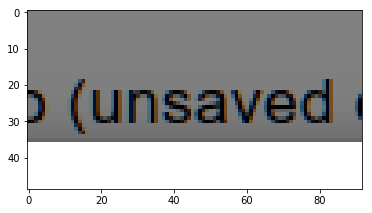

('Text:', '')
(878, 394, 944, 414)
('Text Scale: ', 1650.0)
('Text Thickness: ', 4)


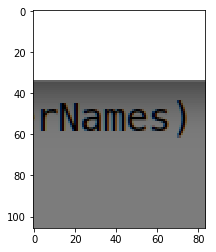

('Text:', '')
(542, 192, 616, 213)
('Text Scale: ', 0.6164611796067977)
('Text Thickness: ', 0)


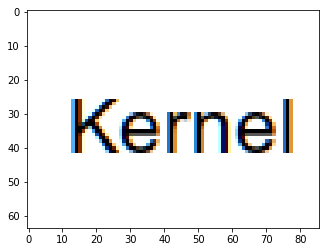

('Text:', 'Kernel')
(648, 961, 764, 982)
('Text Scale: ', 0.05686163016411443)
('Text Thickness: ', 0)


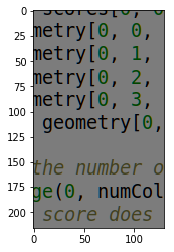

('Text:', '-.. ..\nnetry[0, 0,\nnetry[0, 1,\nnetry[0, 2,\nnetry[0, 3,\ngeometry[0,\nthe number o\nge(, numCol\nscore does')
(584, 267, 630, 281)
('Text Scale: ', 0.3832055981339554)
('Text Thickness: ', 0)


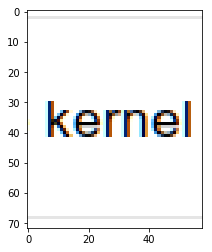

('Text:', 'kernel')
(768, 646, 846, 666)
('Text Scale: ', 0.1299913339110726)
('Text Thickness: ', 0)


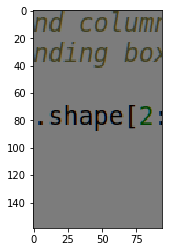

('Text:', 'nd columr\nnding bo)\n. shape[2:')
(538, 580, 582, 597)
('Text Scale: ', 0.07585683745948556)
('Text Thickness: ', 0)


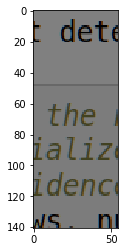

('Text:', 'C det\nthe |\nializ\nidenc\nJ. nl')
(686, 649, 760, 666)
('Text Scale: ', 0.11934713889426489)
('Text Thickness: ', 0)


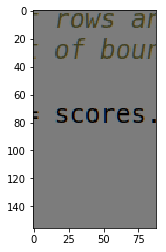

('Text:', '| * FOWS al\n- of bour\n: scores.')
(536, 828, 620, 848)
('Text Scale: ', 0.04827475230454473)
('Text Thickness: ', 0)


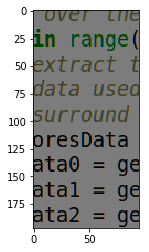

('Text:', 'GUver cre\nin range(\nextract t\ndata usec\nsurround\noresData\nataO = ge\natal = ge\nata2 = ge')
(664, 805, 740, 824)
('Text Scale: ', 0.05757401290869975)
('Text Thickness: ', 0)


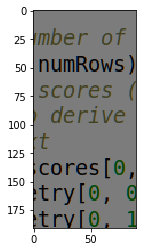

('Text:', 'imber of\nnumRows )\nscores (\n) derive\na\n\ncores[0,\ntry[0, 6\ntrvfO. J')
(986, 603, 1034, 621)
('Text Scale: ', 0.1599786695107319)
('Text Thickness: ', 0)


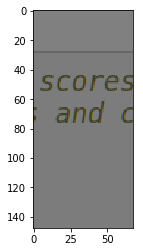

('Text:', 'scores\n; and \xc2\xa2')
(816, 780, 910, 802)
('Text Scale: ', 0.19581701524872927)
('Text Thickness: ', 0)


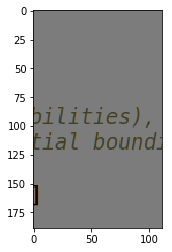

('Text:', 'bilities),\ntial bound:\n|')
(720, 267, 772, 281)
('Text Scale: ', 0.3249187703074231)
('Text Thickness: ', 0)


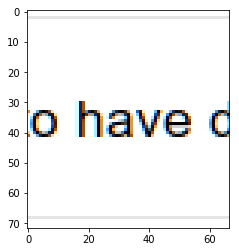

('Text:', 'o have c')
(638, 266, 704, 281)
('Text Scale: ', 0.36658520328815813)
('Text Thickness: ', 0)


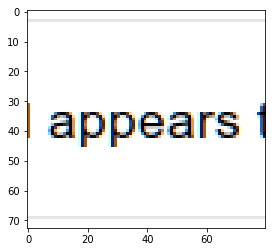

('Text:', 'appears |')
(644, 1056, 726, 1078)
('Text Scale: ', 0.08038900435277047)
('Text Thickness: ', 0)


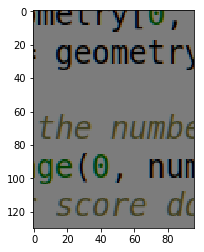

('Text:', 'WELLE YL,\n- geometry)\nthe numbe\nge(\xc2\xae, nur\nscore dc')
(562, 759, 642, 778)
('Text Scale: ', 0.057141224536441826)
('Text Thickness: ', 0)


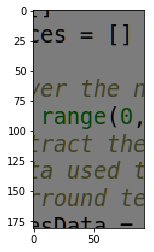

('Text:', '\xe2\x80\x94\nres = []\nyer the n\nrange(0,\ntract the\nra used t\n\xe2\x80\x98round te\xc3\xa9\n\xe2\x80\x94s')
(560, 396, 650, 412)
('Text Scale: ', 2250.0)
('Text Thickness: ', 4)


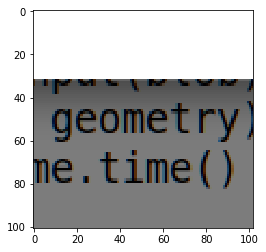

('Text:', '')
(740, 780, 842, 802)
('Text Scale: ', 0.10199592016319348)
('Text Thickness: ', 0)


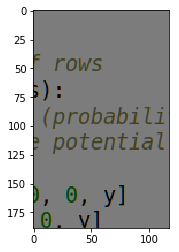

('Text:', 'F rows\n\n38\n(probabili\n> potential\n), 0, y]\n\nQO. vi')
(778, 464, 826, 481)
('Text Scale: ', 0.26660742057320597)
('Text Thickness: ', 0)


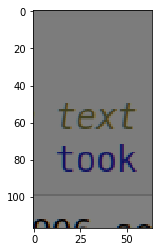

('Text:', 'text\ntook')
(700, 1031, 798, 1051)
('Text Scale: ', 0.07777530872035808)
('Text Thickness: ', 0)


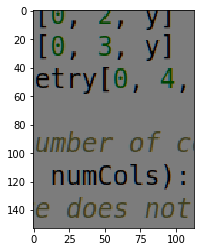

('Text:', 'Mr 41 YI\n(0, 3, yl]\netry[0, 4,\number of c\nnumCols) :\ne does not')
(458, 484, 532, 506)
('Text Scale: ', 0.16085557777584558)
('Text Thickness: ', 0)


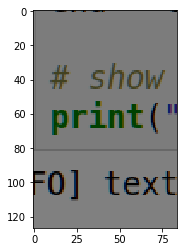

('Text:', '# show\nprint("\nFO] text')
(686, 397, 732, 412)
('Text Scale: ', 1150.0)
('Text Thickness: ', 0)


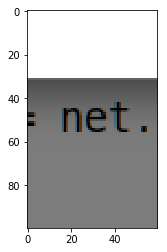

('Text:', '')
(482, 282, 520, 303)
('Text Scale: ', 0.14613136440547608)
('Text Thickness: ', 0)


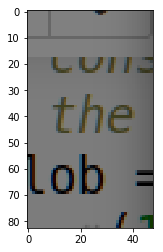

('Text:', '\xe2\x80\x94\nthe\nlob =')
(538, 267, 584, 284)
('Text Scale: ', 0.45981607357057186)
('Text Thickness: ', 0)


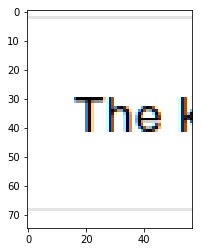

('Text:', 'The |')
(532, 783, 604, 802)
('Text Scale: ', 0.05714104314148757)
('Text Thickness: ', 0)


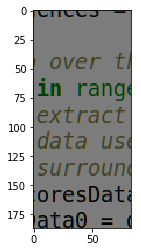

('Text:', ') over tl\nin rang\nextract\ndata us\nsurroun\n\xe2\x80\x98oresDat\nata\xc2\xae = \xc2\xa2')
(664, 483, 776, 504)
('Text Scale: ', 0.15554691406032997)
('Text Thickness: ', 0)


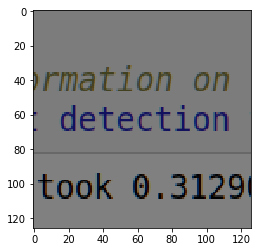

('Text:', 'yrmation on\n- detection\ntook 0.31291')
(604, 894, 678, 915)
('Text Scale: ', 0.055222232172173966)
('Text Thickness: ', 0)


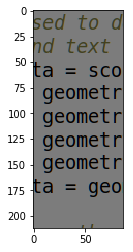

('Text:', 'sed to d\nnd text\n\nta = sco\ngeometr\ngeometr\ngeometr\ngeometr\nta = geo')
(248, 195, 290, 210)
('Text Scale: ', 0.5247376311844077)
('Text Thickness: ', 0)


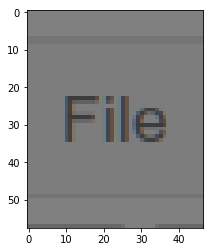

('Text:', 'File')
(500, 966, 546, 983)
('Text Scale: ', 0.06969274589418822)
('Text Thickness: ', 0)


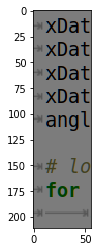

('Text:', 'xDat\nxDat\nxDat\nxDat\nangl\n# Lo\nfor')
(710, 1055, 770, 1076)
('Text Scale: ', 0.08332870396089105)
('Text Thickness: ', 0)


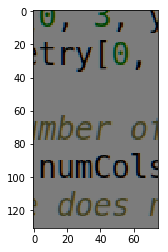

('Text:', 'Mr or)\ntry[0,\nmber 0}\nnumCols\ndoes |')
(908, 600, 980, 621)
('Text Scale: ', 0.1636214889555495)
('Text Thickness: ', 0)


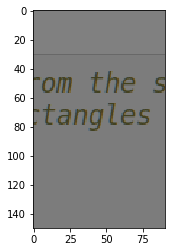

('Text:', '\xe2\x80\x98om the s\n\xe2\x80\x98tangles')
(504, 849, 620, 867)
('Text Scale: ', 0.05523704310394088)
('Text Thickness: ', 0)


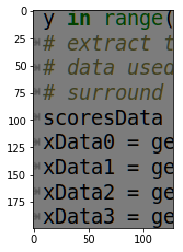

('Text:', 'y in range\\\n# extract t\n# data usea\n# surround\nscoresData\nxDataO = ge\nxDatal = ge\nxData2 = ge\nxData3 = ge')
(568, 644, 660, 666)
('Text Scale: ', 0.09019254146896201)
('Text Thickness: ', 0)


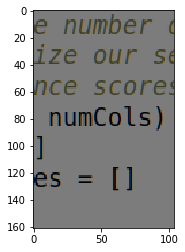

('Text:', 'e number\nize our s\xc3\xa9\nnce score:\nnumCols)\n]\n\nes = []')
(602, 870, 702, 891)
('Text Scale: ', 0.048542746742781695)
('Text Thickness: ', 0)


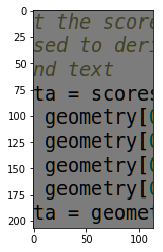

('Text:', 't the score\nsed to der.\nnd text\n\nta = score:\ngeometry [\\\ngeometry [|\ngeometry [\\\ngeometry [\\\nta = geome')
(604, 625, 680, 643)
('Text Scale: ', 0.099994737119099)
('Text Thickness: ', 0)


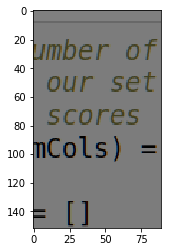

('Text:', 'umber of\nour set\nscores\n\nmCols) =\n= []')
(480, 463, 534, 481)
('Text Scale: ', 0.14998333518497947)
('Text Thickness: ', 0)


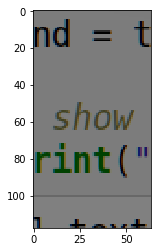

('Text:', 'nd = t\nshow\nrint("')
(660, 758, 760, 777)
('Text Scale: ', 0.09615014807122803)
('Text Thickness: ', 0)


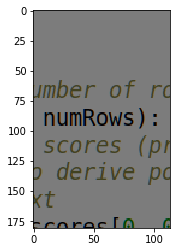

('Text:', 'umber of rc\nnumRows) :\nscores (pl\n9 derive pc\nxt\n\nrn')
(320, 195, 360, 210)
('Text Scale: ', 0.4997501249375313)
('Text Thickness: ', 0)


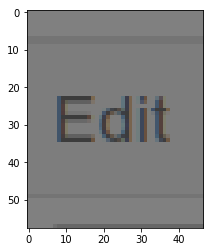

('Text:', 'Edit')
(744, 740, 796, 756)
('Text Scale: ', 0.11817107535678577)
('Text Thickness: ', 0)


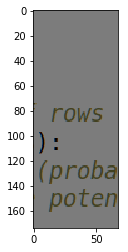

('Text:', "rows\nNE\n(proba\n' poten")
(464, 149, 510, 166)
('Text Scale: ', 0.45981607357057186)
('Text Thickness: ', 0)


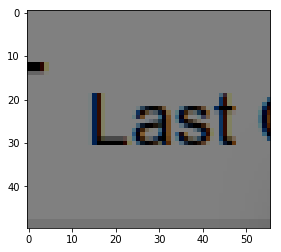

('Text:', '"Last')
(586, 738, 634, 756)
('Text Scale: ', 0.07499531279295044)
('Text Thickness: ', 0)


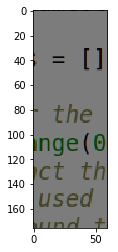

('Text:', '=f]\n~ the\ninge (0\nict th\nused\n~~')
(580, 417, 644, 435)
('Text Scale: ', 1600.0)
('Text Thickness: ', 4)


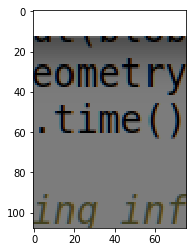

('Text:', '')
(776, 486, 824, 504)
('Text Scale: ', 0.1142748309684792)
('Text Thickness: ', 0)


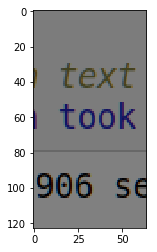

('Text:', ') text\n| took\n906 s\xc3\xa9')
(638, 100, 682, 114)
('Text Scale: ', 0.3141959440159955)
('Text Thickness: ', 0)


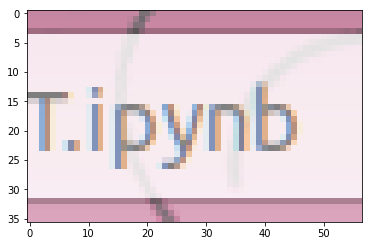

('Text:', 'T-ipynb')
(660, 783, 740, 802)
('Text Scale: ', 0.06557162060260319)
('Text Thickness: ', 0)


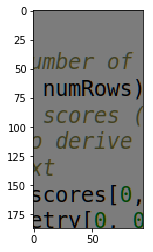

('Text:', 'umber of\nnumRows )\nscores (\n9 derive\nxt\n\nscores[0,\nstryv[O. @')
(614, 486, 668, 504)
('Text Scale: ', 0.1588048464886484)
('Text Thickness: ', 0)


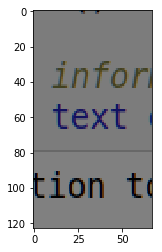

('Text:', 'infor\ntext\ntion t')
(584, 806, 634, 822)
('Text Scale: ', 0.049998000079996795)
('Text Thickness: ', 0)


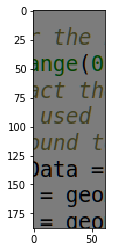

('Text:', '- the\nange (0\nact th\nused\nund t\nJata =\n= geo\n= geo')
(528, 418, 580, 435)
('Text Scale: ', 1300.0)
('Text Thickness: ', 4)


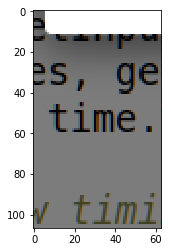

('Text:', '')
(456, 304, 508, 325)
('Text Scale: ', 0.16247969003874516)
('Text Thickness: ', 0)


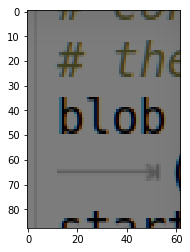

('Text:', '# the\nblob\n\n;\ndl')
(524, 805, 576, 823)
('Text Scale: ', 0.05097839300419591)
('Text Thickness: ', 0)


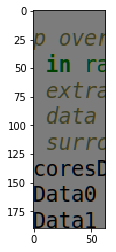

('Text:', 'p over\nin re\nextre\ndata\nsurrc\n\ncoresL\n\nDatad\n\nDatal')
(488, 648, 556, 666)
('Text Scale: ', 0.07083038206741386)
('Text Thickness: ', 0)


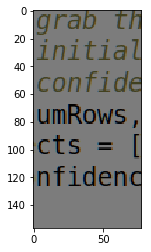

('Text:', 'grab Th\ninitial\nconfide\numRows ,\ncts = [\nnfidenc')
(512, 693, 596, 711)
('Text Scale: ', 0.07499732152423128)
('Text Thickness: ', 0)


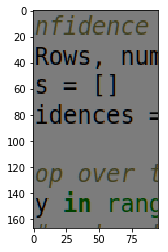

('Text:', 'nfidence\nRows, nun\ns = []\n\nidences =\nop over 1\ny in ranc')
(656, 892, 730, 920)
('Text Scale: ', 0.05211120813498212)
('Text Thickness: ', 0)


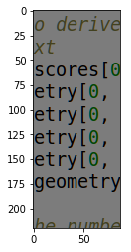

('Text:', 'o derive\nxt\nscores[0\netry[0,\netry[0,\netry[0,\netry[0,\ngeometry\nhe niimhe')
(1048, 784, 1098, 804)
('Text Scale: ', 0.1666444474070124)
('Text Thickness: ', 0)


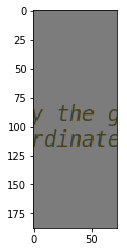

('Text:', 'y the g\nrdinate')
(808, 268, 854, 283)
('Text Scale: ', 0.22995400919816034)
('Text Thickness: ', 0)


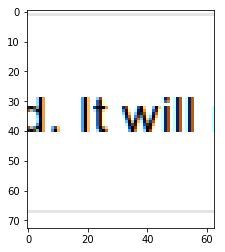

('Text:', 'J. It will')
(624, 829, 684, 847)
('Text Scale: ', 0.04761753595123964)
('Text Thickness: ', 0)


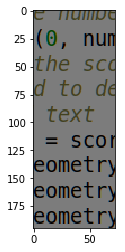

('Text:', 'a.\n(0, nun\nthe scc\nd to de\ntext\n\n= scol\neometry\neometry\neometry')
(500, 1032, 550, 1050)
('Text Scale: ', 0.09614645027305592)
('Text Thickness: ', 0)


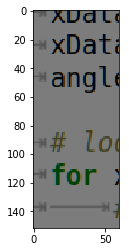

('Text:', '~~\nxDat\nangl\n# Lo\nfor ;\n\n3')
(956, 807, 998, 826)
('Text Scale: ', 0.20995800839832032)
('Text Thickness: ', 0)


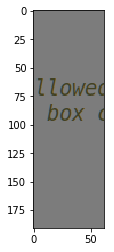

('Text:', 'Llowec\nbox')
(646, 601, 686, 619)
('Text Scale: ', 0.1052520787285549)
('Text Thickness: ', 0)


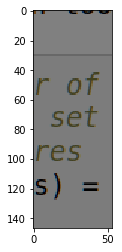

('Text:', 'r of\nset\nres\n\nSs) =')
(456, 670, 516, 687)
('Text Scale: ', 0.08332870396089105)
('Text Thickness: ', 0)


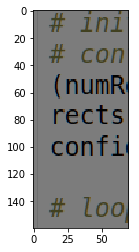

('Text:', '# ini\n# con\n(numR\nrects\nconfi\n# loo,')
(502, 896, 566, 913)
('Text Scale: ', 0.057140816399414304)
('Text Thickness: ', 0)


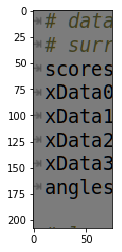

('Text:', '# data\n# surr\nscores\nxData\xc3\xa9\nxDatal\nxData2\nxData3\nangles')
(602, 938, 674, 957)
('Text Scale: ', 0.05142710208279763)
('Text Thickness: ', 0)


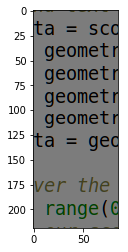

('Text:', 'ta = scc\ngeometr\ngeometr\ngeometr\ngeometr\nta = gec\nver the\nrange (\xe2\x82\xac\xc3\xa9')
(460, 694, 506, 711)
('Text Scale: ', 0.06969274589418822)
('Text Thickness: ', 0)


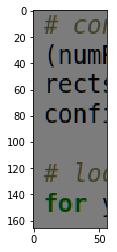

('Text:', '# Col\n(num\nrect:\nconf:\n# lo\nfor |')
(544, 964, 614, 981)
('Text Scale: ', 0.05302869610011818)
('Text Thickness: ', 0)


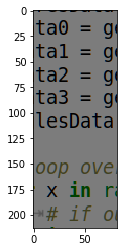

('Text:', 'ta\xc2\xae = gi\ntal = gi\nta2 = gi\nta3 = gi\nlesData\noop ove\nx in r\n# if o')
(602, 600, 642, 622)
('Text Scale: ', 0.095229025807066)
('Text Thickness: ', 0)


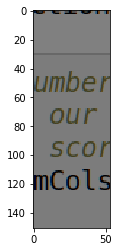

('Text:', 'umber\nour\nscor\n\nmCols')
(502, 940, 572, 958)
('Text Scale: ', 0.06249776793685939)
('Text Thickness: ', 0)


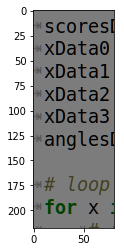

('Text:', 'scoresl\nxDatad\nxDatal\nxData2\nxData3\nanglesl\n# loop\nfor x')
(460, 420, 502, 435)
('Text Scale: ', 0.11051468266498263)
('Text Thickness: ', 0)


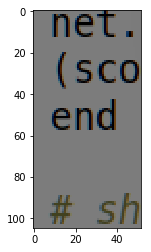

('Text:', 'net.\n(sco\nend\n\n# sh')
(790, 1056, 868, 1083)
('Text Scale: ', 0.1299913339110726)
('Text Thickness: ', 0)


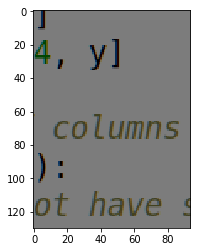

('Text:', '4\n\n4, yl\ncolumns\noF\n\not have :')
(666, 934, 726, 964)
('Text Scale: ', 0.04347700066664735)
('Text Thickness: ', 0)


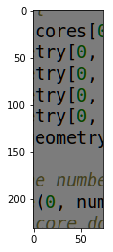

('Text:', 'cores |[(\ntry[0,\ntry[0,\ntry[0,\ntry[0,\neometry\ne numbe\n(0, nun\ncore dc')
(872, 603, 910, 622)
('Text Scale: ', 0.12664978002932942)
('Text Thickness: ', 0)


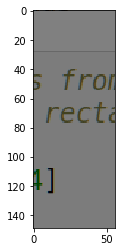

('Text:', '> fror\nrecte\n4]')
(418, 857, 456, 900)
('Text Scale: ', 0.06128636862137927)
('Text Thickness: ', 0)


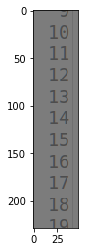

('Text:', '~\n10\n11\n12\n13\n14\n15\n16\n17\n18\n10')
(456, 761, 508, 780)
('Text Scale: ', 0.1130336492478915)
('Text Thickness: ', 0)


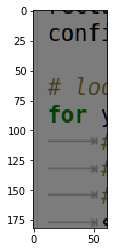

('Text:', 'confi\n# Loc\nfor |\n4\n4\n4')
(590, 1057, 638, 1081)
('Text Scale: ', 0.0774143603638475)
('Text Thickness: ', 0)


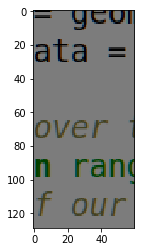

('Text:', '\xe2\x80\x94 oe\nata =\nover 1\nn ran\nf our')
(504, 874, 558, 892)
('Text Scale: ', 0.05094147390664504)
('Text Thickness: ', 0)


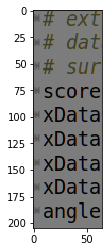

('Text:', '# ext\n# dat\n# sur\nscore\nxData\nxData\nxData\nxData\nangle')
(634, 1010, 674, 1029)
('Text Scale: ', 0.05713959202331295)
('Text Thickness: ', 0)


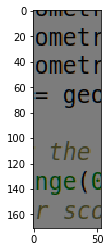

('Text:', 'ometr\nometr\n= gec\n\nthe\nnge(\xc2\xa2\nr sce')
(500, 919, 570, 938)
('Text Scale: ', 0.05932002305006609)
('Text Thickness: ', 0)


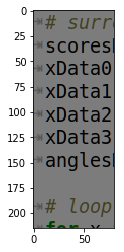

('Text:', '# surr\nscores|\nxDatad\nxDatal\nxData2\nxData3\nangles\n# Loop\n_.')
(418, 1009, 450, 1062)
('Text Scale: ', 0.07999200079992)
('Text Thickness: ', 0)


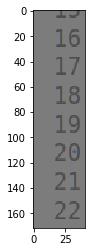

('Text:', '16\n17\n18\n19\n20\n21\n22')
(988, 3, 1048, 20)
('Text Scale: ', 0.4284490145672665)
('Text Thickness: ', 0)


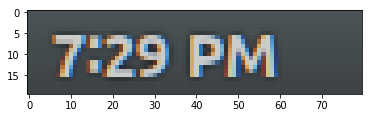

('Text:', '7:29 PM')
(300, 579, 342, 599)
('Text Scale: ', 1.048951048951049)
('Text Thickness: ', 0)


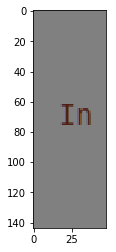

('Text:', 'In')
(1202, 1051, 1246, 1080)
('Text Scale: ', 0.5497251374312844)
('Text Thickness: ', 0)


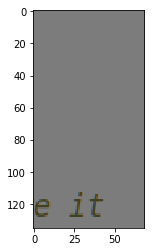

('Text:', 'e it')
(758, 1054, 802, 1078)
('Text Scale: ', 0.07585683745948556)
('Text Thickness: ', 0)


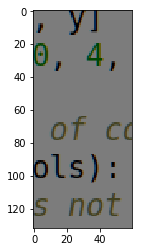

('Text:', '\xc2\xbb Yd\n0, 4,\nof cc\nols):\ns not')
(350, 267, 408, 282)
('Text Scale: ', 0.5797680927628948)
('Text Thickness: ', 0)


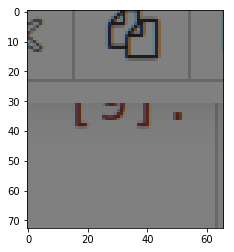

('Text:', '5\nwae')
(678, 151, 734, 167)
('Text Scale: ', 1400.0)
('Text Thickness: ', 4)


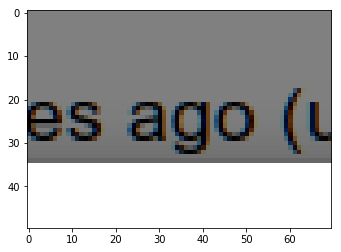

('Text:', '')
(616, 783, 656, 803)
('Text Scale: ', 0.04877810838495683)
('Text Thickness: ', 0)


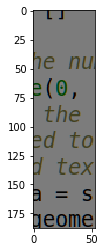

('Text:', '-\nhe nu\n2(0,\n\nthe\n\ned to\n1 tex\na= S\nJeome')
(476, 264, 522, 284)
('Text Scale: ', 0.16426224825024996)
('Text Thickness: ', 0)


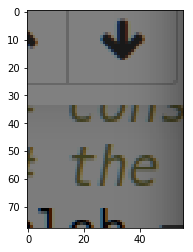

('Text:', 'iv]\n| the\n._.e')
(458, 374, 498, 390)
('Text Scale: ', 0.11109876680368849)
('Text Thickness: ', 0)


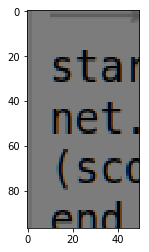

('Text:', 'star\nnet.\n(scc\nend')
(1394, 335, 1432, 355)
('Text Scale: ', 950.0)
('Text Thickness: ', 0)


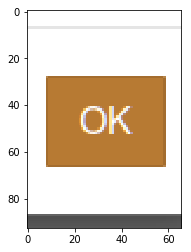

('Text:', '')
(420, 906, 458, 945)
('Text Scale: ', 0.06128636862137927)
('Text Thickness: ', 0)


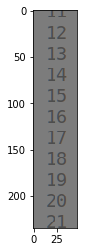

('Text:', '_\n12\n13\n14\n15\n16\n17\n18\n19\n20\na1')
(416, 815, 460, 858)
('Text Scale: ', 0.07856581672737661)
('Text Thickness: ', 0)


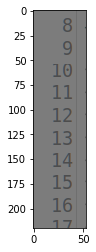

('Text:', '8\n\n9\n10\n11\n12\n13\n14\n15\n16\n~~')
(418, 954, 454, 988)
('Text Scale: ', 0.062064685194124544)
('Text Thickness: ', 0)


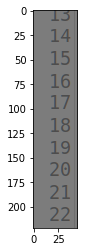

('Text:', '12\n14\n15\n16\n17\n18\n19\n20\n21\n22')
(414, 775, 452, 814)
('Text Scale: ', 0.08260151291192071)
('Text Thickness: ', 0)


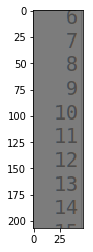

('Text:', 'Go\n7\n8\n9\n10\n11\n12\n13\n14')
(1010, 781, 1054, 806)
('Text Scale: ', 0.1692047377326565)
('Text Thickness: ', 0)


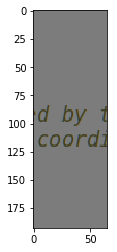

('Text:', 'd by t\ncoordi')


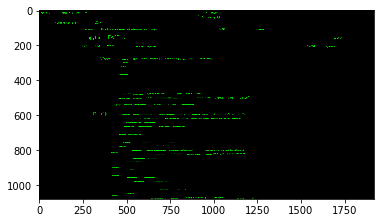

True

In [695]:
# apply non-maxima suppression to suppress weak, overlapping bounding
# boxes
boxes = non_max_suppression(np.array(rects), probs=confidences)

# loop over the bounding boxes
#---Tesseract 
origTesseract = orig.copy()
for (startX, startY, endX, endY) in boxes:
    # scale the bounding box coordinates based on the respective
    # ratios
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)

    #----tessaract
    extraPixelsX = 0.99
    extraPixelsY = 0.90
    croppedImage = origTesseract[int(startY*extraPixelsY):int(endY/extraPixelsY), int(startX*extraPixelsX):int(endX/extraPixelsX)]
    config = ('-l eng --oem 3 --psm 6')
    text = pytesseract.image_to_string(croppedImage, config=config).encode('utf-8')
    print(startX, startY, endX, endY)
    textScale = (2.0*(endX-startX)/200.0)/(len(text)+0.002)*5
    textThickness = max(4*(endX-startX)/200/(len(text)+1)*4, 0)
    print("Text Scale: ", textScale)
    print("Text Thickness: ", textThickness)
    cv2.putText(tesseractOutputImage, str(text), (startX,endY), cv2.FONT_HERSHEY_SIMPLEX, textScale, (0, 255, 0), textThickness, lineType = cv2.LINE_AA)
    plt.imshow(croppedImage)
    plt.show()
    print("Text:", str(text))

plt.imshow(tesseractOutputImage)
plt.show()
cv2.imwrite("tesseract Detection-"+str(min_confidence)+"-"+str(width)+"-"+str(height)+".jpg", tesseractOutputImage)


#----Draw bbox
for (startX, startY, endX, endY) in boxes:
    # scale the bounding box coordinates based on the respective
    # ratios
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)

    # draw the bounding box on the image
#     cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)

    

    
    
# show the output image
# cv2.imshow("Text Detection"+, orig)
# cv2.waitKey(0)
cv2.imwrite("Text Detection-"+str(min_confidence)+"-"+str(width)+"-"+str(height)+".jpg", orig)
